In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import pandas as pd
import nglview as nv
import plumed


In [7]:
def parseDat(filename):
    """Parse a dat (histogram) file and return the most probable CV value

    Args:
        filename (str): the dat file to be parsed with
        
    Returns:
        float: the most probable CV value
    """
    
    data = np.loadtxt(filename)
    CVs = data[:,0]
    counts = data[:,1]
    
    maxCV = -1
    maxCount = -1
    for i, j in zip(CVs, counts):
        if j > maxCount:
            maxCV = i
            maxCount = j
    return data, maxCV


In [10]:
steps = ['RMSDBound', 'EulerTheta', 'EulerPhi', 'EulerPsi', 'PolarTheta', 'PolarPhi', 'r']
eq_hist_files = []
eq_hist_data = []
centers = []
for i in range(1, 8):
    hist_file = f'../BFEE_NAMD/000_eq/output/eq.histogram{i}.dat'
    eq_hist_files.append(f'../BFEE_NAMD/00{i}_{steps[i-1]}/output/abf_1.abf1.czar.pmf')
    data, center = parseDat(hist_file)
    eq_hist_data.append(data)
    centers.append(center)

0.775
6.5
-15.5
16.5
68.5
60.5
6.35


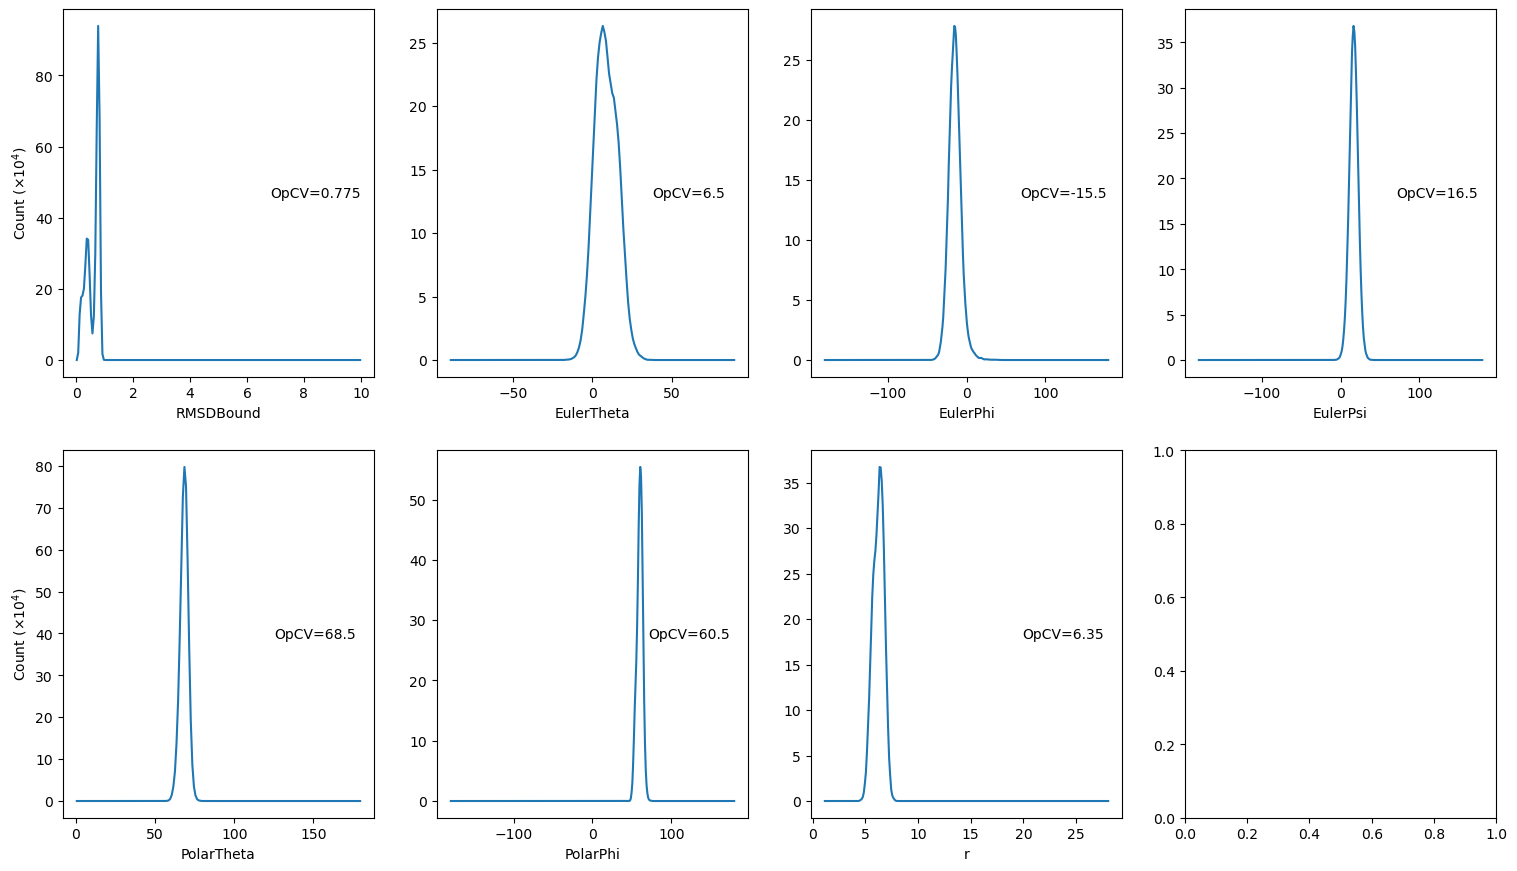

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(18.5, 10.5)
axes = axes.flatten()

for idx, cv_hist in enumerate(eq_hist_data):
    CVs = cv_hist[:,0]
    counts = cv_hist[:,1] /10000
    axes[idx].plot(CVs, counts)
    axes[idx].set_xlabel(steps[idx])
    axes[idx].text(0.81, 0.5, f'OpCV={centers[idx]}', horizontalalignment='center', 
                   verticalalignment='center', transform=axes[idx].transAxes)
    #axes[idx].set_yscale('log')
    if idx == 0 or idx==4:
        axes[idx].set_ylabel('Count ' + r"($\times 10^4$)")
    print(centers[idx])
plt.savefig('figures/CV_hist.png')